In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 1.6em;
line-height:1.4em
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-right:3em;
}
</style>
""")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from itertools import cycle, islice
import pylab as pl
import operator
import re
from collections import OrderedDict
import pickle
import matplotlib.colors as colors
import math
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

#set pandas so i can view all dataframne columns
pd.set_option('display.max_columns', None)

#import csv file
PTCAudit = pd.read_csv('PTCAuditmodel.csv',low_memory=False)
PTCAudit.head()

,Unnamed: 0,AGIFinal2,AUDIT_RESULT2,Agi_Comp,Annl_SLCSP_Prem_Comp,Annual_Contrib_Health_Care_Amt,Aptc_Amt_Comp,Aptc_Amt_From_1040,Bal_Due_Amt_Comp,Bal_Due_Amt_CompFinal2,Bod_Cd2,Current_Ty_Exemptions,Cycle_Scored,DISP_CD,Ddb_Ptc_900_Cdb,Ddb_Ptc_901_Cdb,Ddb_Ptc_902_Cdb,Ddb_Ptc_903_Cdb,Ddb_Ptc_904_Cdb,Ddb_Ptc_910_Cdb,Ddb_Ptc_911_Cdb,Ddb_Ptc_912_Cdb,Ddb_Ptc_913_Cdb,Ddb_Ptc_914_Cdb,Dependent_Ind,Exc_Aptc_Amt,Exc_Aptc_Lim_Amt,Exposure_AmtFinal2,Family_Size,Filing_Status,First_Time_Filer,Fpl_Pct_CompFinal2,Hardship_Ind,Household_Income_Amt,PTC_Scored_Count,Prior_Ty_Exemptions,Prior_Ty_Filing_Status,Ptc_Amt_Comp,Ptc_Amt_To_Agi_Pct_Comp,Ptc_Err_190_Cdb,Ptc_Err_191_Cdb,Ptc_Err_193_Cdb,Ptc_Err_194_Cdb,Ptc_Err_195_Cdb,Ptc_Err_196_Cdb,Ptc_Err_197_Cdb,Ptc_Err_198_Cdb,Ptc_Err_199_Cdb,Ptc_Err_344_Cdb,Ptc_Ind,Ptc_Magi_Amt,Recon_Ptc_Amt,Recon_Ptc_Amt_Sum,Sch_C_Prof_Loss_AmtFinal2,Sch_C_To_Agi_Pct_Comp,Scnd_Taxpayer_Age,Taxpayer_Age,Tot_Income,Unnamed: 0.1,tin
0,0,7.0,1.0,63447,5805,0,0,0,-3389,1.0,2.0,2,201514,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,62,65,63447,0,2077793
1,1,5.0,1.0,31143,5700,2697,0,0,-3592,1.0,2.0,1,201517,4,0,0,0,0,0,0,0,0,0,0,0.0,0,0,11.0,1,1,0.0,3.0,0,31143,1,1,1.0,3003,9.64,0,0,0,0,0,0,0,0,1,0,1,31143,3003,3003,6.0,0.0,0,59,31143,1,2136992
2,2,8.0,1.0,99074,8940,0,0,0,35057,9.0,1.0,1,201535,4,0,0,0,0,0,0,0,1,0,0,1.0,0,0,10.0,0,3,0.0,5.0,0,0,1,2,3.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,0,53,108085,2,2143790
3,3,7.0,1.0,58231,12852,0,0,0,3671,9.0,2.0,2,201528,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,4.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,58,63,58231,3,2205691
4,4,7.0,1.0,62656,11610,0,0,0,-366,4.0,2.0,2,201524,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,10.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,48,51,62656,4,2349124


In [4]:
pd.set_option('display.max_rows', 100)
PTCAudit.dtypes

Unnamed: 0                          int64
AGIFinal2                         float64
AUDIT_RESULT2                     float64
Agi_Comp                            int64
Annl_SLCSP_Prem_Comp                int64
Annual_Contrib_Health_Care_Amt      int64
Aptc_Amt_Comp                       int64
Aptc_Amt_From_1040                  int64
Bal_Due_Amt_Comp                    int64
Bal_Due_Amt_CompFinal2            float64
Bod_Cd2                           float64
Current_Ty_Exemptions               int64
Cycle_Scored                        int64
DISP_CD                             int64
Ddb_Ptc_900_Cdb                     int64
Ddb_Ptc_901_Cdb                     int64
Ddb_Ptc_902_Cdb                     int64
Ddb_Ptc_903_Cdb                     int64
Ddb_Ptc_904_Cdb                     int64
Ddb_Ptc_910_Cdb                     int64
Ddb_Ptc_911_Cdb                     int64
Ddb_Ptc_912_Cdb                     int64
Ddb_Ptc_913_Cdb                     int64
Ddb_Ptc_914_Cdb                   

Some label object variables as numbers (what's this actually called) in order to do feature selection. First, I will look at all the object variables so I can relabel them one at a time---is there a quicker way to do this???.  

Run Ordinary Least Squares Regression on Relationship Between AGI and Family Size/Taxpayer Age.

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('Agi_Comp ~ Tot_Income',PTCAudit).fit()
print (m.summary())

C:\Users\Travis\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:               Agi_Comp   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.145e+06
Date:                Sat, 23 Sep 2017   Prob (F-statistic):               0.00
Time:                        15:04:44   Log-Likelihood:                -89063.
No. Observations:                8438   AIC:                         1.781e+05
Df Residuals:                    8436   BIC:                         1.781e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2934.2838    114.762     25.568      0.0

Interpreting coefficients

We can interpret the RM coefficient (203.94) by first noticing that the p-value (under P>|t|) is so small, basically zero. We can interpret the coefficient as, for every 1 year increase in age, there is a 554 dollar increase in taxpayer AGI. The confidence interval fives us a range of plausible values for this difference, about ( 373 to 736 dollars).------Is this correct?

Now, lets print the intercept and coefficients from a linear regression for AGI and other factors. Next, we will print predicted values for AGI 

In [6]:
from sklearn.linear_model import LinearRegression
X = PTCAudit.drop('Agi_Comp', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm
lm.fit(X, PTCAudit.Agi_Comp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -6320750.66062


In [8]:
print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 59


In [9]:
lm.predict(X)

array([  63398.23766756,   31776.22664572,  116499.76411489, ...,
         27209.6342744 ,   31225.14669822,   31431.95874862])

Now, we will plot AGI predictions and then AGI predictions vs. true AGI amounts.

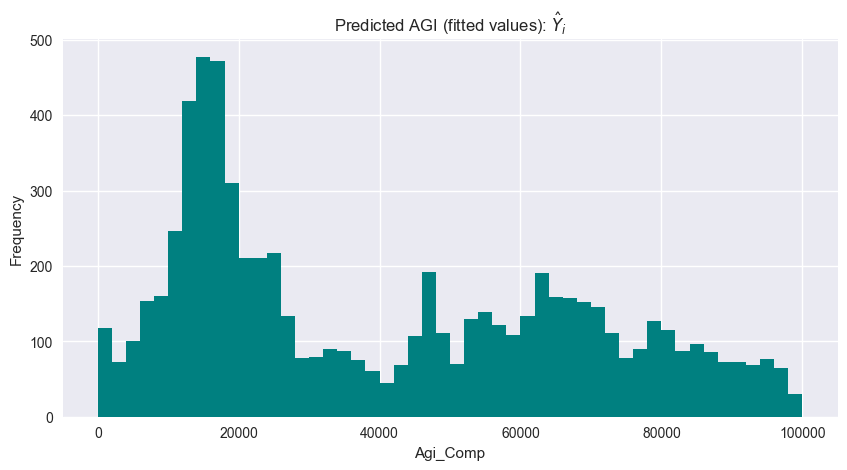

In [10]:
fig = plt.figure(figsize=(10,5), dpi=100)
plt.hist(lm.predict(X),color=sns.desaturate("teal",1), bins=50, range=[0,100000])
plt.title('Predicted AGI (fitted values): $\hat{Y}_i$')
plt.xlabel('Agi_Comp')
plt.ylabel('Frequency')

In [18]:
fig = plt.figure(figsize=(10,5), dpi=100)
plt.scatter(PTCAudit.Agi_Comp, lm.predict(X))
plt.xlabel("AGI: $Y_i$")
plt.ylabel("Predicted AGI: $\hat{Y}_i$")
plt.title("AGI vs Predicted AGI: $Y_i$ vs $\hat{Y}_i$")
#plt.xlim(-1000000, 1000000)
#plt.show()

NameError: name 'lm' is not defined

Print predicted AGI using OLS linear regression to estimate AGI based on taxpayer age, then do the same with taxpayer age and family size.  

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

#df = pd.Dataframe({'RM',
#'PRICE',
#index=np.arange(10, 20, 2)

result = smf.ols('Agi_Comp ~ Taxpayer_Age', PTCAudit).fit()
PTCAudit['yhat'] = result.fittedvalues
PTCAudit['resid'] = result.resid


result2 = sm.OLS(PTCAudit['Agi_Comp'], sm.add_constant(PTCAudit[['Taxpayer_Age']])).fit()
PTCAudit['yhat2'] = result2.fittedvalues
PTCAudit['resid2'] = result2.resid

# predict doesn't return pandas series and no index is available
PTCAudit['predicted'] = result.predict(PTCAudit)
print (PTCAudit)

      Unnamed: 0  AGIFinal2  AUDIT_RESULT2  Agi_Comp  Annl_SLCSP_Prem_Comp  \
0              0        7.0            1.0     63447                  5805   
1              1        5.0            1.0     31143                  5700   
2              2        8.0            1.0     99074                  8940   
3              3        7.0            1.0     58231                 12852   
4              4        7.0            1.0     62656                 11610   
5              5        5.0            1.0     36472                  5301   
6              6        9.0            0.0    100440                  8952   
7              7        8.0            1.0     83424                 10560   
8              8        6.0            0.0     46110                 14568   
9              9        8.0            1.0     89288                 12840   
10            10        3.0            1.0     17399                     0   
11            11        8.0            0.0     75189            

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

#df = pd.Dataframe({'RM',
#'PRICE',
#index=np.arange(10, 20, 2)

result = smf.ols('Agi_Comp ~ Taxpayer_Age +Family_Size', PTCAudit).fit()
PTCAudit['yhat'] = result.fittedvalues
PTCAudit['resid'] = result.resid


result2 = sm.OLS(PTCAudit['Agi_Comp'], sm.add_constant(PTCAudit[['Taxpayer_Age', 'Family_Size']])).fit()
PTCAudit['yhat2'] = result2.fittedvalues
PTCAudit['resid2'] = result2.resid

# predict doesn't return pandas series and no index is available
PTCAudit['predicted'] = result.predict(PTCAudit)
print (PTCAudit)

      Unnamed: 0  AGIFinal2  AUDIT_RESULT2  Agi_Comp  Annl_SLCSP_Prem_Comp  \
0              0        7.0            1.0     63447                  5805   
1              1        5.0            1.0     31143                  5700   
2              2        8.0            1.0     99074                  8940   
3              3        7.0            1.0     58231                 12852   
4              4        7.0            1.0     62656                 11610   
5              5        5.0            1.0     36472                  5301   
6              6        9.0            0.0    100440                  8952   
7              7        8.0            1.0     83424                 10560   
8              8        6.0            0.0     46110                 14568   
9              9        8.0            1.0     89288                 12840   
10            10        3.0            1.0     17399                     0   
11            11        8.0            0.0     75189            

,Unnamed: 0,AGIFinal2,AUDIT_RESULT2,Agi_Comp,Annl_SLCSP_Prem_Comp,Annual_Contrib_Health_Care_Amt,Aptc_Amt_Comp,Aptc_Amt_From_1040,Bal_Due_Amt_Comp,Bal_Due_Amt_CompFinal2,Bod_Cd2,Current_Ty_Exemptions,Cycle_Scored,DISP_CD,Ddb_Ptc_900_Cdb,Ddb_Ptc_901_Cdb,Ddb_Ptc_902_Cdb,Ddb_Ptc_903_Cdb,Ddb_Ptc_904_Cdb,Ddb_Ptc_910_Cdb,Ddb_Ptc_911_Cdb,Ddb_Ptc_912_Cdb,Ddb_Ptc_913_Cdb,Ddb_Ptc_914_Cdb,Dependent_Ind,Exc_Aptc_Amt,Exc_Aptc_Lim_Amt,Exposure_AmtFinal2,Family_Size,Filing_Status,First_Time_Filer,Fpl_Pct_CompFinal2,Hardship_Ind,Household_Income_Amt,PTC_Scored_Count,Prior_Ty_Exemptions,Prior_Ty_Filing_Status,Ptc_Amt_Comp,Ptc_Amt_To_Agi_Pct_Comp,Ptc_Err_190_Cdb,Ptc_Err_191_Cdb,Ptc_Err_193_Cdb,Ptc_Err_194_Cdb,Ptc_Err_195_Cdb,Ptc_Err_196_Cdb,Ptc_Err_197_Cdb,Ptc_Err_198_Cdb,Ptc_Err_199_Cdb,Ptc_Err_344_Cdb,Ptc_Ind,Ptc_Magi_Amt,Recon_Ptc_Amt,Recon_Ptc_Amt_Sum,Sch_C_Prof_Loss_AmtFinal2,Sch_C_To_Agi_Pct_Comp,Scnd_Taxpayer_Age,Taxpayer_Age,Tot_Income,Unnamed: 0.1,tin,yhat,resid,yhat2,resid2,predicted
0,0,7.0,1.0,63447,5805,0,0,0,-3389,1.0,2.0,2,201514,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.00,62,65,63447,0,2077793,82066.524181,-18619.524181,82066.524181,-18619.524181,82066.524181
1,1,5.0,1.0,31143,5700,2697,0,0,-3592,1.0,2.0,1,201517,4,0,0,0,0,0,0,0,0,0,0,0.0,0,0,11.0,1,1,0.0,3.0,0,31143,1,1,1.0,3003,9.64,0,0,0,0,0,0,0,0,1,0,1,31143,3003,3003,6.0,0.00,0,59,31143,1,2136992,64534.453583,-33391.453583,64534.453583,-33391.453583,64534.453583
2,2,8.0,1.0,99074,8940,0,0,0,35057,9.0,1.0,1,201535,4,0,0,0,0,0,0,0,1,0,0,1.0,0,0,10.0,0,3,0.0,5.0,0,0,1,2,3.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.00,0,53,108085,2,2143790,79619.141238,19454.858762,79619.141238,19454.858762,79619.141238
3,3,7.0,1.0,58231,12852,0,0,0,3671,9.0,2.0,2,201528,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,4.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.00,58,63,58231,3,2205691,81658.627024,-23427.627024,81658.627024,-23427.627024,81658.627024
4,4,7.0,1.0,62656,11610,0,0,0,-366,4.0,2.0,2,201524,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,10.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.00,48,51,62656,4,2349124,79211.244081,-16555.244081,79211.244081,-16555.244081,79211.244081
5,5,5.0,1.0,36472,5301,2746,0,0,-3420,1.0,2.0,2,201520,4,0,0,0,0,0,0,0,0,0,0,0.0,0,0,11.0,2,2,0.0,3.0,0,36472,1,2,2.0,3240,8.88,0,0,0,0,0,0,0,0,1,0,1,36472,3240,3240,6.0,0.00,44,39,36472,5,2402689,44147.102886,-7675.102886,44147.102886,-7675.102886,44147.102886
6,6,9.0,0.0,100440,8952,0,0,0,3930,9.0,2.0,3,201523,2,0,0,0,0,0,0,0,1,0,0,1.0,0,0,11.0,0,2,0.0,5.0,0,0,1,4,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.00,36,36,100440,6,2594841,76152.015403,24287.984597,76152.015403,24287.984597,76152.015403
7,7,8.0,1.0,83424,10560,0,0,0,-2655,1.0,1.0,3,201527,4,0,0,0,0,0,0,0,1,0,0,1.0,0,0,11.0,0,2,0.0,5.0,0,0,1,4,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.00,45,46,83424,7,2613420,78191.501189,5232.498811,78191.501189,5232.498811,78191.501189
8,8,6.0,0.0,46110,14568,0,0,0,-2391,2.0,2.0,1,201528,2,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,1,0.0,5.0,0,0,1,0,0.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.00,0,25,46110,8,2703846,73908.581039,-27798.581039,73908.581039,-27798.581039,73908.581039
9,9,8.0,1.0,89288,12840,0,0,0,17178,9.0,1.0,3,201526,4,0,0,0,0,0,0,0,1,0,0,1.0,0,0,11.0,0,2,0.0,5.0,0,0,1,3,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,0.00,53,60,102045,9,2763687,81046.781288,8241.218712,81046.781288,8241.218712,81046.781288


Split data into training and test sets, fit a linear regression, and plot residuals.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, PTCAudit.Agi_Comp, test_size=0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(5653, 59)
(2785, 59)
(5653,)
(2785,)


In [15]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [16]:
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 61170041.21384502
Fit a model X_train, and calculate MSE with X_test, Y_test: 46485931.01167717


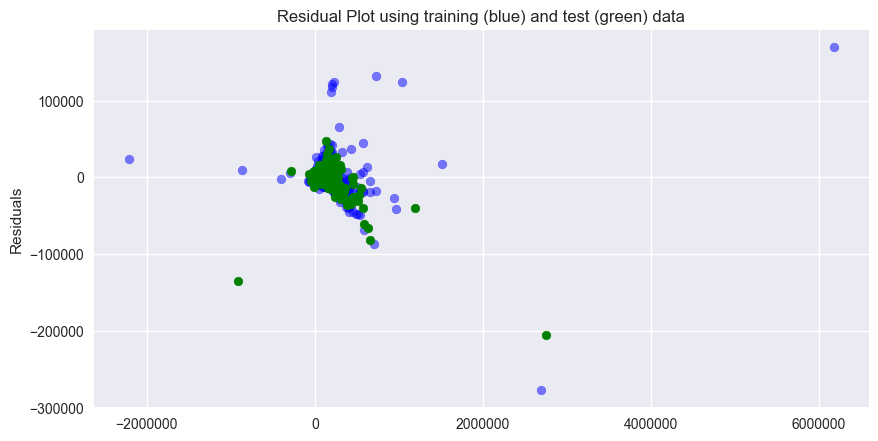

In [17]:
fig = plt.figure(figsize=(10,5), dpi=100)
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

Data (both blue and green) that clusters around the line is a good indicator model generalizes well.

Logistic Regression


Now, we will use logistic regression to try to predict whether PTC returns will be audited.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Compute ROC curve and area the curve
def plot_roc(y_test,y_score):
    lw = 2
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, lw=lw,
             label='ROC')
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
             label='Luck')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve: AUC={0:0.2f}'.format(roc_auc))
    plt.legend(loc="lower right")
    plt.show()
    
# Plot Precision-Recall curve
def plot_pr(y_test,y_score):
    lw = 2
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)

    plt.figure()
    plt.plot(recall, precision, lw=lw, color='navy',
             label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve: AUC={0:0.2f}'.format(average_precision))
    plt.legend(loc="lower left")
    plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression

In [104]:
X = PTCAudit.drop(['AUDIT_RESULT2','Agi_Comp','Ptc_Err_190_Cdb'], axis=1).values
y = PTCAudit.AUDIT_RESULT2.values
Xlabels = PTCAudit.drop(['AUDIT_RESULT2','Agi_Comp','Ptc_Err_190_Cdb'], axis=1).columns

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('Accuracy score of training set: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy score of test set: {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy score of training set: 0.706
Accuracy score of test set: 0.708


In [106]:
# GridSearchCV by default does cross-validation, so we don't need 
# to manually split the data into training and test data
Cs = [0.001, 0.1, 1, 10, 100, 1000, 10000]
lr = LogisticRegression()
clf = GridSearchCV(lr, {'C':Cs})
clf.fit(X, y)
print(clf.best_params_)
print('Accuracy score: {:.3f}'.format(clf.score(X, y)))

{'C': 0.001}
Accuracy score: 0.706


In [107]:
nfold = 5
y_true = np.zeros(len(y)) 
y_pred = np.zeros(len(y))
decfun = np.zeros(len(y))
f_impo = np.zeros([nfold,X.shape[1]])
n_scor = np.zeros(nfold)
offset = 0
n = 0
clf = LogisticRegression()

for train, test in StratifiedKFold(nfold).split(X, y):
    clf.fit(X[train], y[train])
    y_pred[offset:(offset+len(test))] = clf.predict(X[test])
    y_true[offset:(offset+len(test))] = y[test]
    decfun[offset:(offset+len(test))] = clf.decision_function(X[test])
    f_impo[n,:] = clf.coef_
    n_scor[n] = clf.score(X[test],y[test])
    offset += len(test)
    n += 1

In [108]:
print('Accuracy scores for each fold:')
print(n_scor)
print ('Mean accuracy score: {:.2f}'.format(np.mean(n_scor)))

Accuracy scores for each fold:
[ 0.70675355  0.7049763   0.70675355  0.7071725   0.70598696]
Mean accuracy score: 0.71


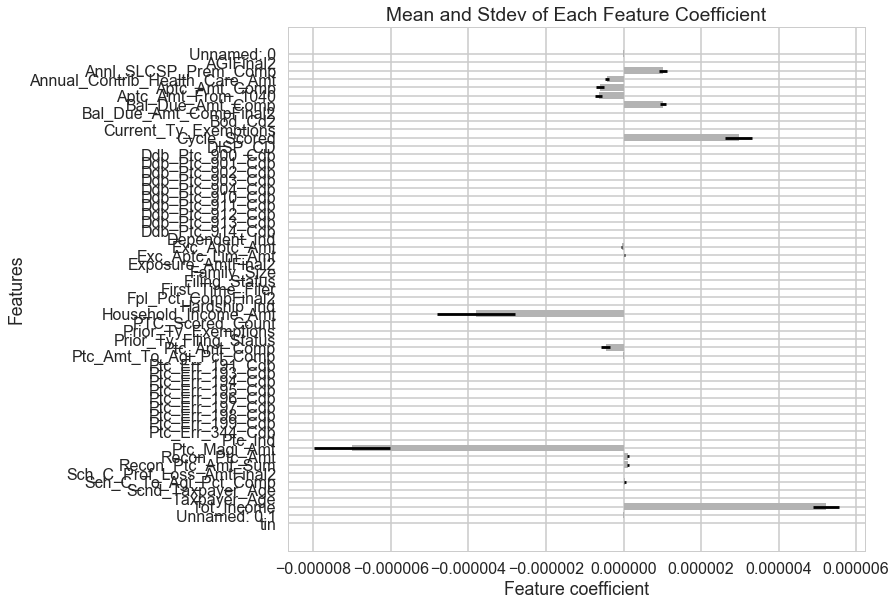

In [109]:
#plot mean and standard deviation of coefficient values for each features over the folds
fig = plt.figure(figsize=(20,20), dpi=500)
xerr=np.std(f_impo,axis=0)
plt.figure()
plt.barh(range(len(f_impo[0])),np.mean(f_impo,axis=0),xerr=xerr,color='0.7')
plt.yticks(range(len(f_impo[0])),Xlabels,rotation=0)
plt.xlabel('Feature coefficient')
plt.ylabel('Features')
plt.title('Mean and Stdev of Each Feature Coefficient')
plt.gca().invert_yaxis()
plt.tight_layout();

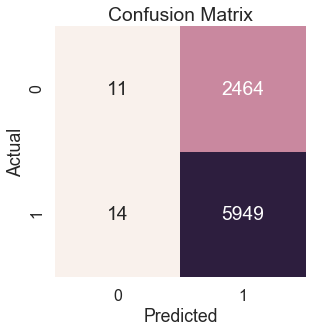

In [110]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_true, y_pred),index=[0,1],columns=[0,1]), 
            square=True, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout();

Why is everything being marked as fraud?

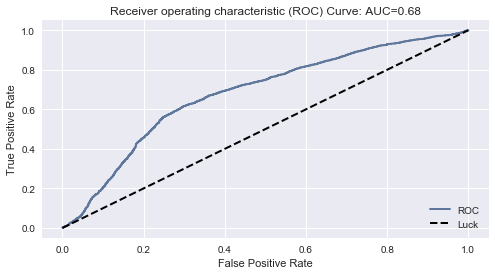

In [27]:
plot_roc(y_true,decfun)

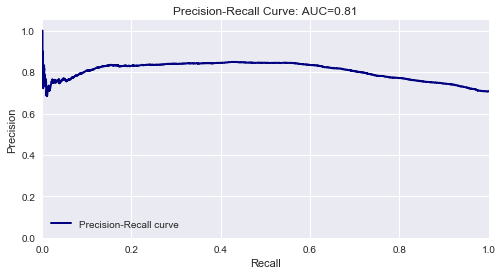

In [46]:
plot_pr(y_true,decfun)

In [78]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

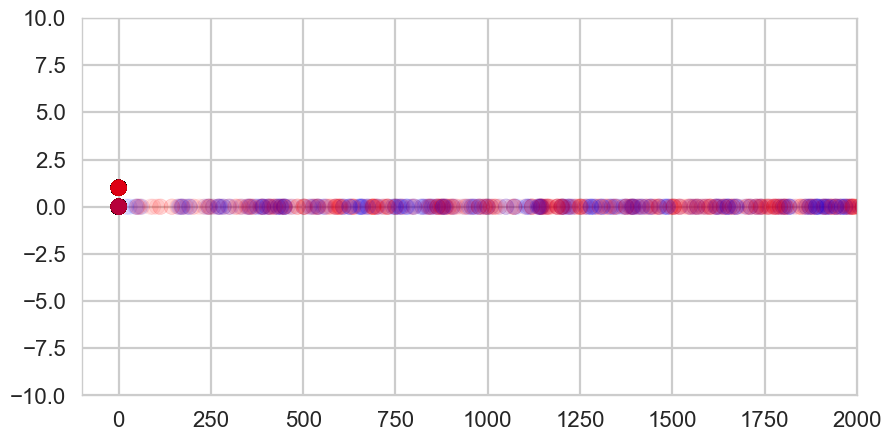

In [79]:
fig = plt.figure(figsize=(10,5), dpi=100)
plt.scatter(PTCAudit.Aptc_Amt_Comp, PTCAudit.Ptc_Err_190_Cdb, c=[cm_bright.colors[i] for i in PTCAudit.AUDIT_RESULT2==0], alpha=0.08);
plt.xlim(-100, 2000)
plt.ylim(-10, 10)
plt.show()

---Play around with this more----

Automatic Feature Selection

Often we collected many features that might be related to a supervised prediction task, but we don't know which of them are actually predictive. To improve interpretability, and sometimes also generalization performance, we can use automatic feature selection to select a subset of the original features. There are several types of feature selection methods available, which we'll explain in order of increasing complexity.

For a given supervised model, the best feature selection strategy would be to try out each possible subset of the features, and evaluate generalization performance using this subset. However, there are exponentially many subsets of features, so this exhaustive search is generally infeasible. The strategies discussed below can be thought of as proxies for this infeasible computation.

Model-based Feature Selection

A somewhat more sophisticated method for feature selection is using a supervised machine learning model and selecting features based on how important they were deemed by the model. This requires the model to provide some way to rank the features by importance. This can be done for all tree-based models (which implement get_feature_importances) and all linear models, for which the coefficients can be used to determine how much influence a feature has on the outcome.

Any of these models can be made into a transformer that does feature selection by wrapping it with the SelectFromModel class:

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(PTCAudit [['Agi_Comp','Aptc_Amt_Comp',
    'Ptc_Err_190_Cdb']].values, 
                                              (PTCAudit.AUDIT_RESULT2 == 1).values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the training and testing data.
print(accuracy_score(clf.predict(Xlr), ylr))
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.714285714286
0.7


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(PTCAudit.values, 
                                              (PTCAudit.AUDIT_RESULT2 == 1).values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the training and testing data.
print(accuracy_score(clf.predict(Xlr), ylr))
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.710493046776
0.694786729858


Using feature selection techniques above, I can discern that the variable Ptc_Err_190_Cdb (action by the taxpayer in which they fail to attach a Form 8962 to the tax return) produces a model more effective at predicting fraudulent returns (71.4% training, 70% on test) than does a model with all variables included (71.0% on training and 69.4% on test). Both models generalize very well to the test data.

Tune model for cross-validation

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [20]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.714128093213


Use Gridsearch to find best parameters for model

In [ ]:
from sklearn.grid_search import GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(PTCAudit[['Agi_Comp','Aptc_Amt_Comp']].values, 
                                              (PTCAudit.AUDIT_RESULT2 == 1).values,random_state=5)

clf3 = LogisticRegression(C=.0001)
# Fit the model on the trainng data.
clf3.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf3.predict(Xtestlr), ytestlr))

Let's first set some code up for classification that we will need for further discussion on the math. We first set up a function `cv_optimize` which takes a classifier `clf`, a grid of hyperparameters (such as a complexity parameter or regularization parameter) implemented as a dictionary `parameters`, a training set (as a samples x features array) `Xtrain`, and a set of labels `ytrain`. The code takes the traning set, splits it into `n_folds` parts, sets up `n_folds` folds, and carries out a cross-validation by splitting the training set into a training and validation section for each foldfor us. It prints the best value of the parameters, and retuens the best classifier to us.

In [21]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

We then use this best classifier to fit the entire training set. This is done inside the `do_classify` function which takes a dataframe `indf` as input. It takes the columns in the list `featurenames` as the features used to train the classifier. The column `targetname` sets the target. The classification is done by setting those samples for which `targetname` has value `target1val` to the value 1, and all others to 0. We split the dataframe into 80% training and 20% testing by default, standardizing the dataset if desired. (Standardizing a data set involves scaling the data so that it has 0 mean and is described in units of its standard deviation. We then train the model on the training set using cross-validation. Having obtained the best classifier using `cv_optimize`, we retrain on the entire training set and calculate the training and testing accuracy, which we print. We return the split data and the trained classifier.

In [22]:
from sklearn.model_selection import train_test_split

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [23]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           PTCAudit, ['Aptc_Amt_Comp', 'Agi_Comp'], 'AUDIT_RESULT2',1)

NameError: name 'sklearn' is not defined

NameError: name 'points_plot' is not defined

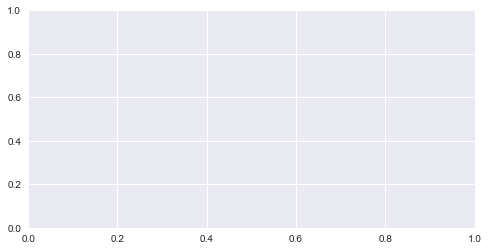

In [35]:
fig = plt.figure(figsize=(10,5), dpi=100)
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2);
plt.xlim(-10000, 10000)
plt.ylim(-2500, 50000)
plt.show()

In [36]:
clf_l.predict_proba(Xtest_l)

NameError: name 'clf_l' is not defined

In [ ]:
fig = plt.figure(figsize=(10,5), dpi=100)
plt.figure()
ax = plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.2);
plt.xlim(-10000, 10000)
plt.ylim(-2500, 50000)
plt.show()

Model-based Feature Selection¶
A somewhat more sophisticated method for feature selection is using a supervised machine learning model and selecting features based on how important they were deemed by the model. This requires the model to provide some way to rank the features by importance. This can be done for all tree-based models (which implement get_feature_importances) and all linear models, for which the coefficients can be used to determine how much influence a feature has on the outcome.
Any of these models can be made into a transformer that does feature selection by wrapping it with the SelectFromModel class:

In [97]:
from sklearn.model_selection import train_test_split
X, y = PTCAudit, PTCAudit["AUDIT_RESULT2"]
train_X, test_X, train_y, test_y = train_test_split(X, y)
#print("Labels for training and testing data")
#print(train_y)
#print(test_y)

In [98]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [99]:
select.fit(train_X, train_y)
X_train_rf = select.transform(train_X)
print(train_X.shape)
print(X_train_rf.shape)

(6328, 60)
(6328, 30)


In [100]:
X_test_rf = select.transform(test_X)
LogisticRegression().fit(X_train_rf, train_y).score(X_test_rf, test_y)

0.72511848341232232

The features selected by this model produce a model that is 70.8% effective at classifying fraudulent returns on the test set---is there a way I can what features the model selected?

This method builds a single model (in this case a random forest) and uses the feature importances from this model. We can do a somewhat more elaborate search by training multiple models on subsets of the data. One particular strategy is recursive feature elimination:

Recursive Feature Elimination

Recursive feature elimination builds a model on the full set of features, and similar to the method above selects a subset of features that are deemed most important by the model. However, usually only a single feature is dropped from the dataset, and a new model is built with the remaining features. The process of dropping features and model building is repeated until there are only a pre-specified number of features left:

In [101]:
from sklearn.model_selection import train_test_split
X, y = PTCAudit, PTCAudit["AUDIT_RESULT2"]
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

In [103]:
clf = RandomForestClassifier()
clf.fit(train_X, train_y)
print('Accuracy score of training set: {:.3f}'.format(clf.score(train_X,train_y)))
print('Accuracy score of test set: {:.3f}'.format(clf.score(test_X,test_y)))

Accuracy score of training set: 1.000
Accuracy score of test set: 1.000


Why am I getting such a high accuracy score? I know this can not be correct because my logistic regression score is like 70.6%.

In [30]:
from sklearn.linear_model import LogisticRegression
X_train_rfe = select.transform(train_X)
X_test_rfe = select.transform(test_X)

LogisticRegression().fit(X_train_rfe, train_y).score(X_test_rfe, test_y)

0.72037914691943128

Recursive feature selection produced a slightly better model than the single random forest model we trained above (70.9% vs. 70.8% effective), but just barely!

Decision Trees and SVM

Random Forest 

Decision trees are great for nonlinear and conditional relationships. They are also fast, but prone to overfitting. In practice the ensemble technique of random forest is used instead of a single decision tree. Random forest runs a number of decision trees on a subset of the data, and averages to improve prediction and counteract overfitting. This model also provides a measure of feature importance.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [32]:
PTCAudit = PTCAudit[PTCAudit.columns.difference(['DISP_CD'])]

In [33]:
X, y = PTCAudit, PTCAudit["AUDIT_RESULT2"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [35]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print('Accuracy score of training set: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy score of test set: {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy score of training set: 1.000
Accuracy score of test set: 0.997


The model is not generalizing well to the test data. This is probably because we have way too many features in the model. Just trying to arbitrarily select a few features, let's see if we can find the model generalizes better.

In [97]:
#X, y = PTCAuditinputs ["Ptc_Err_190_Cdb"] , PTCAudit["AUDIT_RESULT2"]

In [36]:
PTCAudit = PTCAudit[PTCAudit.columns.difference(['DISP_CD'])]

In [37]:
from sklearn.model_selection import train_test_split
X, y = PTCAudit, PTCAudit["AUDIT_RESULT2"]
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_X, train_y)
print('Accuracy score of training set: {:.3f}'.format(clf.score(train_X,train_y)))
print('Accuracy score of test set: {:.3f}'.format(clf.score(test_X,test_y)))

In [23]:
PTCAudit.head()

,AGIFinal2,AUDIT_RESULT2,Agi_Comp,Annl_SLCSP_Prem_Comp,Annual_Contrib_Health_Care_Amt,Aptc_Amt_Comp,Aptc_Amt_From_1040,Bal_Due_Amt_Comp,Bal_Due_Amt_CompFinal2,Bod_Cd2,Current_Ty_Exemptions,Cycle_Scored,DISP_CD,Ddb_Ptc_900_Cdb,Ddb_Ptc_901_Cdb,Ddb_Ptc_902_Cdb,Ddb_Ptc_903_Cdb,Ddb_Ptc_904_Cdb,Ddb_Ptc_910_Cdb,Ddb_Ptc_911_Cdb,Ddb_Ptc_912_Cdb,Ddb_Ptc_913_Cdb,Ddb_Ptc_914_Cdb,Dependent_Ind,Exc_Aptc_Amt,Exc_Aptc_Lim_Amt,Exposure_AmtFinal2,Family_Size,Filing_Status,First_Time_Filer,Fpl_Pct_CompFinal2,Hardship_Ind,Household_Income_Amt,PTC_Scored_Count,Prior_Ty_Exemptions,Prior_Ty_Filing_Status,Ptc_Amt_Comp,Ptc_Amt_To_Agi_Pct_Comp,Ptc_Err_190_Cdb,Ptc_Err_191_Cdb,Ptc_Err_193_Cdb,Ptc_Err_194_Cdb,Ptc_Err_195_Cdb,Ptc_Err_196_Cdb,Ptc_Err_197_Cdb,Ptc_Err_198_Cdb,Ptc_Err_199_Cdb,Ptc_Err_344_Cdb,Ptc_Ind,Ptc_Magi_Amt,Recon_Ptc_Amt,Recon_Ptc_Amt_Sum,Sch_C_Prof_Loss_AmtFinal2,Sch_C_To_Agi_Pct_Comp,Scnd_Taxpayer_Age,Taxpayer_Age,Tot_Income,Unnamed: 0,tin
0,7.0,1.0,63447,5805,0,0,0,-3389,1.0,2.0,2,201514,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,62,65,63447,0,2077793
1,5.0,1.0,31143,5700,2697,0,0,-3592,1.0,2.0,1,201517,4,0,0,0,0,0,0,0,0,0,0,0.0,0,0,11.0,1,1,0.0,3.0,0,31143,1,1,1.0,3003,9.64,0,0,0,0,0,0,0,0,1,0,1,31143,3003,3003,6.0,0.0,0,59,31143,1,2136992
2,8.0,1.0,99074,8940,0,0,0,35057,9.0,1.0,1,201535,4,0,0,0,0,0,0,0,1,0,0,1.0,0,0,10.0,0,3,0.0,5.0,0,0,1,2,3.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,0,53,108085,2,2143790
3,7.0,1.0,58231,12852,0,0,0,3671,9.0,2.0,2,201528,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,4.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,58,63,58231,3,2205691
4,7.0,1.0,62656,11610,0,0,0,-366,4.0,2.0,2,201524,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,10.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,48,51,62656,4,2349124


SVM

Support Vector Machines are great for non-linear models, since you can have arbitrarily more dimensions with little additional computational cost, because of the "kernel trick". We will try a series of kernels. It is more difficult to glean learnings from SVM - the coefficients especially for higher order models don't necessarily indicate feature importance.
It is recommended that the data be normalized; SVM is not scale invariant. The SVM algorithm in sci-kit learn takes in both [-1,1] or [0,1]. The columns that will be normalized are number of projects, average monthly hours, time spent in company; all other columns have values between 0 and 1.

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [40]:
from sklearn.model_selection import train_test_split
X, y = PTCAudit, PTCAudit["AUDIT_RESULT2"]
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [ ]:
#see how well the default model works
clf = SVC(kernel='linear')
clf.fit(train_X, train_y)
print(clf.score(train_X,train_y))

In [ ]:
train_X

In [ ]:
PTCAudit

In [ ]:
from sklearn.linear_model import LinearRegression
X = PTCAudit.drop('Agi_Comp', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm
lm.fit(X, PTCAudit.Agi_Comp)